In [169]:
# ML Assignment 1

In [170]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [171]:
# doublecheck function
# Check if cluster's center and standard approximate to those of given factor

def doubleCheck(cluster, center, standard, num):

    xSum = 0
    ySum = 0
    V = 0
    xV = 0
    yV = 0
    
    for i in range(num):
        xSum += cluster[0][i]
        ySum += cluster[1][i]
        V += (cluster[0][i] - center[0][0])**2 + (cluster[1][i] - center[1][0])**2
        xV += (cluster[0][i] - center[0][0])**2
        yV += (cluster[1][i] - center[1][0])**2
    
    V /= num
    xV /= num
    yV/= num
    calStand = math.sqrt(V)
    xStand = math.sqrt(xV)
    yStand = math.sqrt(yV)
    
    
    print("Cor Center : (%f,%f)/Cal Center : (%f, %f)/Cor Stand : %f/Cal Stand : %f/Cal xStand : %f/Cal yStand : %f"  \
          %(center[0][0], center[1][0], xSum/num , ySum/num, standard, calStand, xStand, yStand))
    
    

In [172]:
center0 = [[5],[10]] #set center of cluster 0
standard0 = 1 #set standard of cluster 0

center1 = [[10],[5]] #set center of cluster1
standard1 = 1 #set standard of cluster1
num = 500 #set learning number and testing number

lrnCluster0 = np.random.normal(center0, standard0, [2,num])  #create learning cluster 0
lrnCluster1 = np.random.normal(center1, standard1, [2,num])     #create learning cluster 1

tstCluster0 = np.random.normal(center0, standard0, [2,num])  #create testing cluster 0
tstCluster1 = np.random.normal(center1, standard1, [2,num])     #create testing cluster 1

In [173]:
#double checking created clusters have given factors
doubleCheck(lrnCluster0, center0, standard0, num)
doubleCheck(lrnCluster1, center1, standard1, num)
doubleCheck(tstCluster0, center0, standard0, num)
doubleCheck(tstCluster1, center1, standard1, num)


Cor Center : (5.000000,10.000000)/Cal Center : (4.963268, 10.002707)/Cor Stand : 1.000000/Cal Stand : 1.450811/Cal xStand : 1.040997/Cal yStand : 1.010534
Cor Center : (10.000000,5.000000)/Cal Center : (10.048481, 5.049636)/Cor Stand : 1.000000/Cal Stand : 1.365722/Cal xStand : 0.973792/Cal yStand : 0.957562
Cor Center : (5.000000,10.000000)/Cal Center : (5.022526, 10.009724)/Cor Stand : 1.000000/Cal Stand : 1.437648/Cal xStand : 1.054432/Cal yStand : 0.977244
Cor Center : (10.000000,5.000000)/Cal Center : (9.992579, 5.040610)/Cor Stand : 1.000000/Cal Stand : 1.410009/Cal xStand : 1.007908/Cal yStand : 0.986026


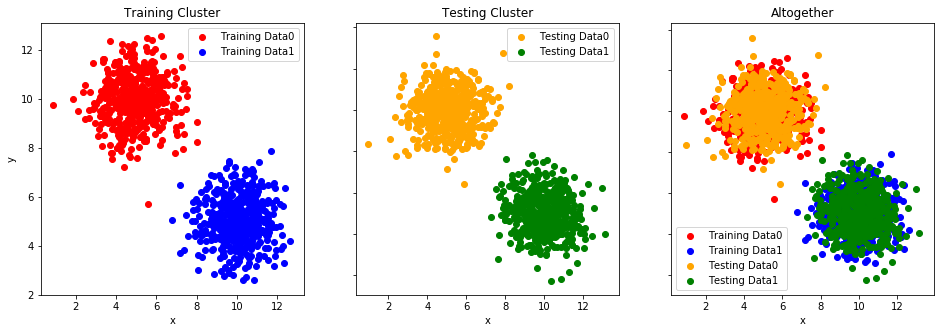

In [174]:
#plot the training and testing datasets

fig, axs = plt.subplots(1, 3, figsize = (16,5))


axs[0].set_title('Training Cluster')
axs[1].set_title('Testing Cluster')
axs[2].set_title('Altogether')

axs[0].scatter(lrnCluster0[0], lrnCluster0[1], color = 'red', label = 'Training Data0')
axs[0].scatter(lrnCluster1[0], lrnCluster1[1], color = 'blue', label = 'Training Data1')



axs[1].scatter(tstCluster0[0], tstCluster0[1], color = 'orange', label = 'Testing Data0')
axs[1].scatter(tstCluster1[0], tstCluster1[1], color = 'green', label = 'Testing Data1')

axs[2].scatter(lrnCluster0[0], lrnCluster0[1], color = 'red', label = 'Training Data0')
axs[2].scatter(lrnCluster1[0], lrnCluster1[1], color = 'blue', label = 'Training Data1')
axs[2].scatter(tstCluster0[0], tstCluster0[1], color = 'orange', label = 'Testing Data0')
axs[2].scatter(tstCluster1[0], tstCluster1[1], color = 'green', label = 'Testing Data1')

axs[0].legend()
axs[1].legend()
axs[2].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

for ax in axs.flat:
    ax.label_outer()

In [175]:
#Using gradient descent algorithm




learningLoss = list()
testingLoss = list()
learningAcc = list()
testingAcc = list()




#init u, v, b, lrnStep(alpha) and repeating time
u = 0
v = 0
b = 0
lrnStep = 0.01
repeat = 100





for step in range(repeat):

    #Gradient descent
    L = 0.01     #Learning Loss
    du = 0       
    dv = 0
    db = 0
    tstL = 0     #Testing Loss
    lrnCorNum = 0
    tstCorNum = 0

    for i in range(num):
        z = u * lrnCluster0[0][i] + v * lrnCluster0[1][i] + b
        tstZ = u * tstCluster0[0][i] + v * tstCluster0[1][i] + b
        
        a = 1/(1 + np.exp(-z))
        tstA = 1/(1 + np.exp(-tstZ))
        
        if(a <= 0.5):
            lrnCorNum += 1
        
        if(tstA <= 0.5):
            tstCorNum += 1
        
        L += - (0 * np.log(a) + (1-0) * np.log(1-a))
        tstL += -(0 * np.log(tstA) + (1-0) * np.log(1-tstA))
        
        dz = a - 0
        du += lrnCluster0[0][i] * dz
        dv += lrnCluster0[1][i] * dz
        db += dz


    for i in range(num):
        z = u * lrnCluster1[0][i] + v * lrnCluster1[1][i] + b
        tstZ = u * tstCluster1[0][i] + v * tstCluster1[1][i] + b
        
        a = 1/(1 + np.exp(-z))
        tstA = 1/(1 + np.exp(-tstZ))
        
        if(a > 0.5):
            lrnCorNum += 1
            
        if(tstA > 0.5):
            tstCorNum +=1
        
        L += -(1 * np.log(a) + (1-1) * np.log(1 - a))
        tstL += -(1 * np.log(tstA) + (1-1) * np.log(1-tstA))
        
        dz = a - 1
        du += lrnCluster1[0][i] * dz
        dv += lrnCluster1[1][i] * dz
        db += dz

    L /= 2 * num
    du /= 2 * num
    dv /= 2 * num
    db /= 2 * num
    u = u - lrnStep * du
    v = v - lrnStep * dv
    b = b - lrnStep * db
    tstL /= 2 * num
    
    learningLoss.append(L)
    testingLoss.append(tstL)
    learningAcc.append(lrnCorNum/(2*num))
    testingAcc.append(tstCorNum/(2*num))

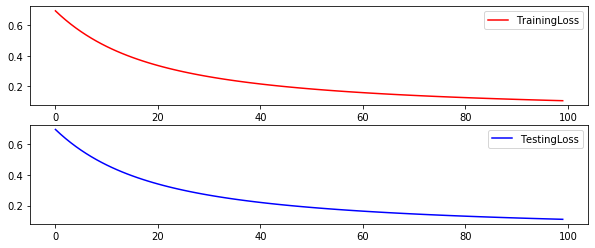

In [176]:
fig, axs = plt.subplots(2,1, figsize = (10,4))


axs[0].plot(learningLoss, color = 'red', label = "TrainingLoss")


axs[1].plot(testingLoss, color = 'blue', label = "TestingLoss")


axs[0].legend()
axs[1].legend()

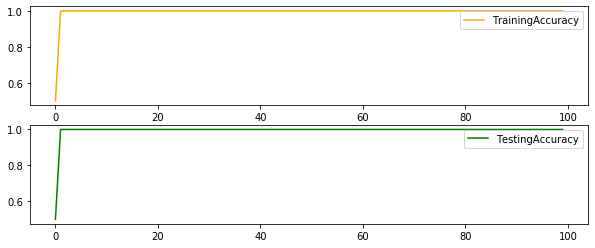

In [177]:
fig, axs = plt.subplots(2,1, figsize = (10,4))


axs[0].plot(learningAcc, color = 'orange', label = "TrainingAccuracy")


axs[1].plot(testingAcc, color = 'green', label = "TestingAccuracy")


axs[0].legend()
axs[1].legend()